In [3]:
import json
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm

In [8]:
DATA_DIR = Path('D:/cs348k_eval')

# dict: pipeline -> list[(nlights, frametimes)]
data = dict()

for filename in tqdm(list(DATA_DIR.iterdir())):
    if '.json' not in filename.name:
        continue
    if (DATA_DIR / 'clusters_old' / filename.name).exists():
        filename = DATA_DIR / 'clusters_old' / filename.name
    pipeline, nlights = filename.stem.split('_')
    nlights = int(nlights.split('=')[-1])
    if pipeline not in data.keys():
        data[pipeline] = []
    with open(filename) as f:
        frametimes = np.array(json.load(f))
    data[pipeline].append((nlights, frametimes))

100%|██████████| 732/732 [00:01<00:00, 650.09it/s] 


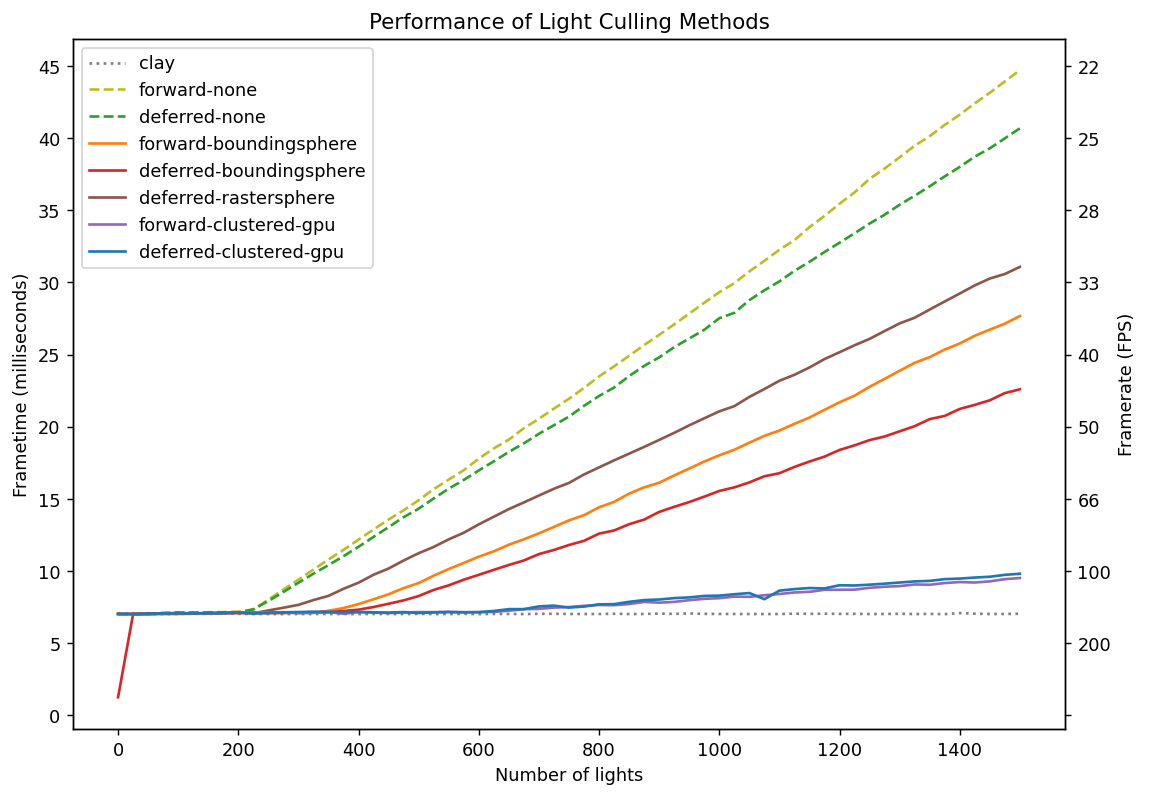

In [77]:
frametime_trim = 5
max_nlights = 1500
items = [
    #'none',
    'clay',
    'forward-none',
    'deferred-none',
    'forward-boundingsphere',
    'deferred-boundingsphere',
    'deferred-rastersphere',
    'forward-clustered-gpu',
    'deferred-clustered-gpu'
]
colors = [
    #'black',
    'gray',
    'tab:olive',
    'tab:green',
    'tab:orange',
    'tab:red',
    'tab:brown',
    'tab:purple',
    'tab:blue'
]
styles = [
    #':',
    ':',
    '--',
    '--',
    '-',
    '-',
    '-',
    '-',
    '-',
]


fig, ax_L = plt.subplots(dpi=128, figsize=(10,7))
ax_R = ax_L.twinx()
for pipeline, color, linestyle in zip(items, colors, styles):
    d = data[pipeline]
    d = [_d for _d in d if _d[0] <= max_nlights]
    nlights, frametimes = zip(*d)
    frametimes = [f[frametime_trim:-frametime_trim].mean()*1000 for f in frametimes]
    ax_L.plot(nlights, frametimes, label=pipeline, color=color, linestyle=linestyle)

ax_L.set_yticks(list(range(0,46,5)))
ax_R.set_yticks(ax_L.get_yticks())

ax_R.set_ylabel('Framerate (FPS)')
ax_R.set_ylim(*ax_L.get_ylim())
yticklabels = ['']
for t in ax_R.get_yticklabels()[1:]:
    v = float(t.get_text())
    if v > 0.0:
        yticklabels.append(str(int(1000/v)))
    else:
        yticklabels.append('')
ax_R.set_yticklabels(yticklabels)


ax_L.legend()
ax_L.set_xlabel('Number of lights')
ax_L.set_ylabel('Frametime (milliseconds)')
ax_L.set_title('Performance of Light Culling Methods')
plt.show()